xは自分で新しくtime_doubleの数列を作って入れます\
時間幅内に入る要素をwhereで取ってきてから緯度方向に1マスずつ値を探していく

In [97]:
import pyspedas
from pytplot import get_data, store_data, tplot_names, tplot
from pyspedas import time_clip, time_double, time_string, tinterpol
import numpy as np
from load import mca, orb

In [98]:
day = 31
unit_time_width = 3600 #1h
lat_array = np.arange(55, 90)

matrix = []

start_time = time_double('1990-01-20 00:00:00')
end_time = start_time+day*24*unit_time_width
times = np.arange(start_time, end_time + unit_time_width, unit_time_width, dtype=float)
times_string = time_string(times, fmt = '%Y-%m-%d %H:%M:%S')

In [99]:
days = np.arange(start_time, end_time + 24*unit_time_width, 24*unit_time_width, float)
days_string = time_string(days, fmt= '%Y-%m-%d %H:%M:%S')

In [100]:
trange = [days_string[0], days_string[1]]
mca(trange)
orb(trange)
tplot_name = ['Emax', 'Eave', 'Bmax', 'Bave']
for i in range(4):
        tplot_variable = get_data(tplot_name[i])
        tplot_variable_float = (tplot_variable.y).astype(float)
        np.place(tplot_variable_float, tplot_variable_float == 254, np.nan)
        tplot_variable_0dB = 1e-6 #mV or pT
        bandwidth = tplot_variable.v * 0.3
        tplot_variable_amplitude = (10**(tplot_variable_float/20)) * (tplot_variable_0dB)  / np.sqrt(bandwidth)
        tplot_variable_power = (10**(tplot_variable_float/10)) * ((tplot_variable_0dB)**2)  / bandwidth
        store_data(tplot_name[i] +'_Amp', data={'x': tplot_variable.times, 'y': tplot_variable_amplitude, 'v': tplot_variable.v})
        store_data(tplot_name[i] +'_Pwr', data={'x': tplot_variable.times, 'y': tplot_variable_power, 'v': tplot_variable.v})


In [101]:
tinterpol('akb_ILAT', interp_to='Emax', newname = 'ILAT')
tinterpol('akb_MLAT', interp_to='Emax', newname = 'MLAT')
tinterpol('akb_MLT', interp_to='Emax', newname = 'MLT', method = 'nearest')

tinterpol (linear) was applied to: ILAT
tinterpol (linear) was applied to: MLAT
tinterpol (nearest) was applied to: MLT


In [118]:
unit_time_width = 3600 #1h
start_time = time_double(days_string[0])
hours = time_string(np.arange(start_time, start_time + 25*unit_time_width, unit_time_width))
i = 4
time_clip('Emax_Pwr', time_start=hours[i], time_end=hours[i+1], new_names='Emax_Pwr_cliped')
time_clip('ILAT', time_start=hours[i], time_end=hours[i+1], new_names='ILAT_cliped')
time_clip('MLT', time_start=hours[i], time_end=hours[i+1], new_names='MLT_cliped')
time_clip('MLAT', time_start=hours[i], time_end=hours[i+1], new_names='MLAT_cliped')
print(hours[i])
Emax_pwr = get_data('Emax_Pwr_cliped')
Emax_pwr = Emax_pwr.y.T[0] #3.16Hz
ILAT = get_data('ILAT_cliped')
ILAT = ILAT.y
MLAT = get_data('MLAT_cliped')
MLAT = MLAT.y
MLT_t = get_data('MLT_cliped')
MLT = MLT_t.y
Emax = get_data('Emax_Pwr_cliped')


Emax_Pwr copied to Emax_Pwr_cliped
Time clip was applied to: Emax_Pwr_cliped
ILAT copied to ILAT_cliped
Time clip was applied to: ILAT_cliped
MLT copied to MLT_cliped
Time clip was applied to: MLT_cliped
MLAT copied to MLAT_cliped
Time clip was applied to: MLAT_cliped
1990-01-20 04:00:00.000000


In [139]:
Emax.y.shape

(450, 16)

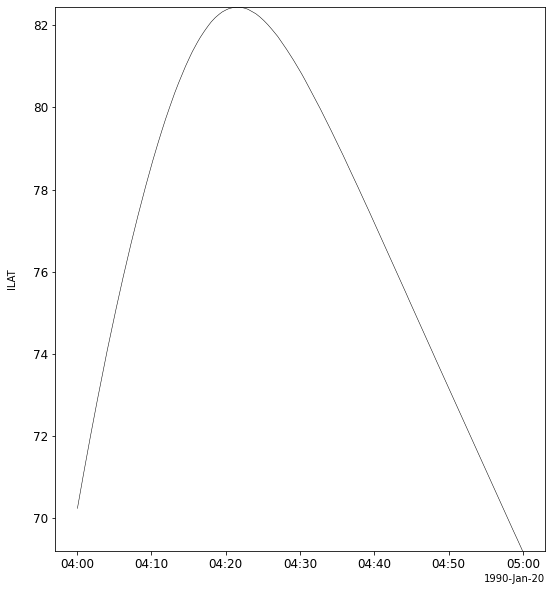

In [120]:
tplot('ILAT_cliped')

UT 1990-01-20 04:00:00の配列を作ってみる

In [140]:
lat_array = np.arange(55, 90)
north_pwr_list_per_hour = []
for lat in lat_array:
    index_tuple = np.where((MLAT>0) & (ILAT<lat+1) & (ILAT>lat)) 
    index = index_tuple[0]
    try:
        ILAT_a = ILAT[index[0]]
        ILAT_b = ILAT[index[-1]]
        Emax_1deg = Emax_pwr[index[0]:index[-1]]
        print('pwr:', np.nanmax(Emax_1deg))
        north_pwr_list_per_hour.append(np.nanmean(Emax_1deg))
    except Exception as e:
        print(e)
        north_pwr_list_per_hour.append(np.nan)
len(north_pwr_list_per_hour)


index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
pwr: 0.02104706920268041
pwr: 0.26496690263044753
pwr: 0.26496690263044753
pwr: 0.26496690263044753
pwr: 0.26496690263044753
pwr: 0.26496690263044753
pwr: 0.26496690263044753
pwr: 0.26496690263044753
pwr: 0.26496690263044753
pwr: 0.08378989168722743
pwr: 0.08378989168722743
pwr: 0.08378989168722743
pwr: 0.04199442402065023
pwr

35

In [141]:
lat_array = np.arange(55, 90)
lat_array.size

35

In [144]:
c = []
a = [1, 2, 3]
b = [2, 3, 4]
c.append(a)
c

[[1, 2, 3]]

In [146]:
c.append(b)
c

[[1, 2, 3], [2, 3, 4], [2, 3, 4]]

一カ月丸っとやるにはこのエラーを何とかしなきゃない

In [53]:
import load
load.mca(['1990-01-10', '1990-02-20'])
load.orb(['1990-01-10', '1990-02-20'])
tinterpol('akb_ILAT', interp_to='Emax', newname = 'ILAT')
tinterpol('akb_MLAT', interp_to='Emax', newname = 'MLAT')
tinterpol('akb_MLT', interp_to='Emax', newname = 'MLT', method = 'nearest')

tinterpol (linear) was applied to: ILAT
tinterpol (linear) was applied to: MLAT
tinterpol (nearest) was applied to: MLT


In [38]:
tplot_names(True)

['Emax',
 'Eave',
 'Bmax',
 'Bave',
 'PostGap',
 'akb_Pass',
 'akb_ILAT',
 'akb_MLAT',
 'akb_MLT',
 'akb_ALT',
 'akb_Bmdl_X',
 'akb_Bmdl_Y',
 'akb_Bmdl_Z',
 'ILAT',
 'MLAT',
 'MLT']

In [45]:
E = get_data('Emax', xarray = True)
ILAT = get_data('akb_ILAT', xarray=True)

In [49]:
print(E)
print('------')
ILAT

<xarray.DataArray 'Emax' (time: 86400, v_dim: 16)>
array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)
Coordinates:
  * time       (time) float64 6.319e+08 6.319e+08 ... 6.326e+08 6.326e+08
    spec_bins  (v_dim) float32 3.16 5.62 10.0 17.8 ... 5.62e+03 1e+04 1.78e+04
    v          (v_dim) float32 3.16 5.62 10.0 17.8 ... 5.62e+03 1e+04 1.78e+04
Dimensions without coordinates: v_dim
Attributes:
    CDF:           {'VATT': {'AVG_TYPE': 'log', 'CATDESC': 'Electric field ma...
    plot_options:  {'xaxis_opt': {'axis_label': 'Time', 'crosshair': 'X', 'x_...
------


<xarray.DataArray 'akb_ILAT' (time: 23041)>
array([47.06, 47.03, 47.01, ..., 83.35, 81.66, 79.83])
Coordinates:
  * time     (time) float64 6.319e+08 6.319e+08 ... 6.326e+08 6.326e+08
Attributes:
    plot_options:  {'xaxis_opt': {'axis_label': 'Time', 'crosshair': 'X', 'x_...

In [48]:
ILAT.interp({'time': E[0]}, method = 'linear')

InvalidIndexError: Reindexing only valid with uniquely valued Index objects